In [33]:
# Imports
from dateutil.parser import parse
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize':(10,7), 'figure.dpi':120})

# Import dataframe
df = pd.read_csv(r"C:\Users\m.al-zadid\OneDrive - Washington State University (email.wsu.edu)\WSU Pullman\Coursework\7th Semester\CPT_S 575\Project\Main Dataset.csv")

In [ ]:
### RANDOM FOREST WITH INTERNAL VARIABLES

In [34]:
# add lag features
df["lag1"]  = df["caputil"].shift(1)
df["lag2"]  = df["caputil"].shift(2)
df["lag3"]  = df["caputil"].shift(3)
df["lag4"]  = df["caputil"].shift(4)
df["lag5"]  = df["caputil"].shift(5)
df["lag6"]  = df["caputil"].shift(6)
df["lag9"]  = df["caputil"].shift(9)
df["lag12"] = df["caputil"].shift(12)
df["lag18"] = df["caputil"].shift(18)
df["lag24"] = df["caputil"].shift(24)


# drop first rows (NaN lags)
df = df.dropna()


## incorporate intervention dummy 

df["observation_date"] = pd.to_datetime(df["observation_date"])
df = df.sort_values("observation_date")
df = df.set_index("observation_date")

df["intervention_dummy"] = (df.index >= "2020-04-01").astype(int)



In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

df["laborp"] = df["laborp"].ffill()

features = ["pmi", "inv", "prodhr", "emp", "laborp",
            "lag1", "lag2", "lag3", "lag4", "lag5", 
            "lag6", "lag9", "lag12", "lag18", "lag24",
            "intervention_dummy"]
target = "caputil"

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, shuffle=False
)

rf = RandomForestRegressor(
    n_estimators=5000,
    max_features = "log2",
    random_state=42
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

#MAPE and RMSE
mape = np.mean(np.abs((y_test - y_pred) / y_test))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("MAPE:", mape)
print("RMSE:", rmse)


MAPE: 0.007783348966527644
RMSE: 0.6414818245834848


In [ ]:
### RF WITH EXT RISK INDICATORS

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

df["laborp"] = df["laborp"].ffill()
df["stopg"] = df["stopg"].ffill()

features = ["pmi", "inv", "prodhr", "emp", "laborp",
            "epui", "gscpi", "stopg", "ngpi", "iepi",
            "lag1", "lag2", "lag3", "lag4","lag5","lag6","lag9","lag12","lag18","lag24",
           "intervention_dummy"]
target = "caputil"

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, shuffle=False
)

rf = RandomForestRegressor(
    n_estimators=5000,
    max_features="log2",
    random_state=42
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

##MAPE and RMSE
mape = np.mean(np.abs((y_test - y_pred) / y_test))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("MAPE:", mape)
print("RMSE:", rmse)


MAPE: 0.008702819432903136
RMSE: 0.7730808882663549


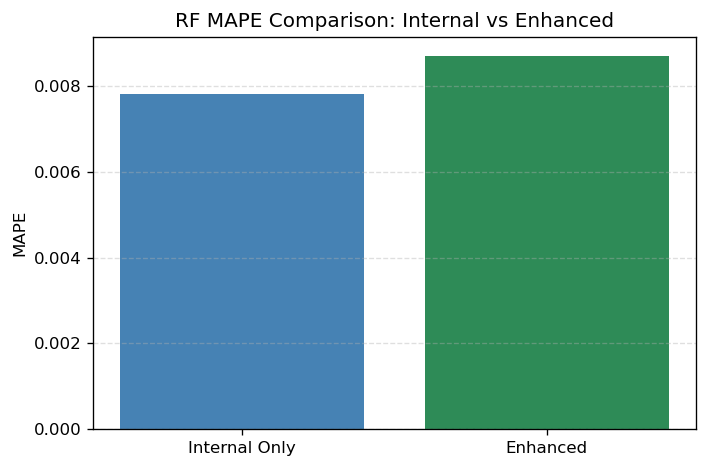

In [39]:
import matplotlib.pyplot as plt

mape_internal = 0.0078
mape_enhanced = 0.0087

plt.figure(figsize=(6,4))
plt.bar(["Internal Only", "Enhanced"], 
        [mape_internal, mape_enhanced],
        color=["steelblue", "seagreen"])

plt.ylabel("MAPE")
plt.title("RF MAPE Comparison: Internal vs Enhanced")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


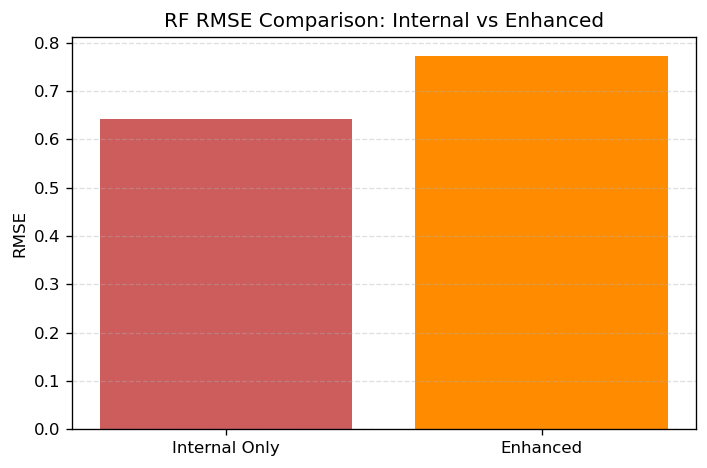

In [40]:
import matplotlib.pyplot as plt

rmse_internal = 0.6415
rmse_enhanced = 0.7731

plt.figure(figsize=(6,4))
plt.bar(["Internal Only", "Enhanced"], 
        [rmse_internal, rmse_enhanced],
        color=["indianred", "darkorange"])

plt.ylabel("RMSE")
plt.title("RF RMSE Comparison: Internal vs Enhanced")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [32]:
import pandas as pd

importances = rf.feature_importances_
feature_names = X_train.columns

rf_importance_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

print(rf_importance_df)


               feature  importance
10                lag1    0.149518
11                lag2    0.140441
12                lag3    0.112358
13                lag4    0.108322
14                lag5    0.061161
15                lag6    0.054116
18               lag18    0.053944
2               prodhr    0.047883
19               lag24    0.045321
17               lag12    0.042735
3                  emp    0.037638
16                lag9    0.034476
0                  pmi    0.034432
8                 ngpi    0.019633
1                  inv    0.012574
9                 iepi    0.012264
4               laborp    0.012183
5                 epui    0.009228
6                gscpi    0.007805
7                stopg    0.003738
20  intervention_dummy    0.000229
